In [2]:
from LogErrLoader import LoadDNDSLogErr
import numpy as np
import matplotlib.pyplot as plt


results_O4 = LoadDNDSLogErr("CRM_0/O4_0_MG4jc2_.log")
results_O4_HQMSD = LoadDNDSLogErr("CRM_0/O4_0_MG4jc2-HQMSD_.log")
results_O4_ZCBOPT = LoadDNDSLogErr("CRM_0/O4_0_MG4jc2-ZCBOPT_.log")

def getEndMean(dataResults, name, N = 50):
    return np.array(dataResults[name][-N-1:-1]).mean()
def getEndStd(dataResults, name, N = 50):
    return np.array(dataResults[name][-N-1:-1]).std()

def printResults(dataResults):
    print(f"O4: CL {getEndMean(dataResults, "CL"):.5e}, CD {getEndMean(dataResults, "CD"):.5e}, AOA {getEndMean(dataResults, "AoA"):.5e}")

printResults(results_O4)
printResults(results_O4_HQMSD)
printResults(results_O4_ZCBOPT)
N = 100
print(f"O4 AOA is at {getEndMean(results_O4, "AoA", N)} +- {getEndStd(results_O4, "AoA", N)}")



O4: CL 4.99994e-01, CD 2.51323e-02, AOA 2.41468e+00
O4: CL 4.99460e-01, CD 2.62773e-02, AOA 2.43658e+00
O4: CL 4.99985e-01, CD 2.52825e-02, AOA 2.41691e+00
O4 AOA is at 2.4146778875999995 +- 4.440892098500626e-16


In [3]:
data_CRM = []
data_CRM.append((LoadDNDSLogErr("CRM_0/O2_starter_.log"), "O2 start"))
data_CRM.append(
    (
        LoadDNDSLogErr("CRM_0/O4_0_.log"),
        "O4 GMRES5x1-ILU2",
    )
)
data_CRM.append(
    (
        LoadDNDSLogErr("CRM_0/O4_0_MG4jc2_.log"),
        "O4 GMRES5x1-ILU2-4[ILU2]",
    )
)
data_CRM.append(
    (
        LoadDNDSLogErr("CRM_0/O4_0_MG22jc2-4jc2_.log"),
        "O4 GMRES5x1-ILU2-2m2[ILU2]-4[ILU2]",
    )
)
data_CRM.append(
    (
        LoadDNDSLogErr("CRM_0/O4_0_MG4jc0_.log"),
        "O4 GMRES5x1-ILU2-4[Jacobi]",
    )
)


lwc = 1

markEvery = 200

markerList = (
    ".",
    "o",
    "v",
    "^",
    "<",
    ">",
    "8",
    "s",
    "p",
    "*",
    "h",
    "H",
    "D",
    "d",
    "P",
    "X",
)


def plotOne(data, label, plotIndex=0, xAxis="tWall", yAxis="res0", markevery = markEvery):
    xdata = np.array(data[xAxis][0:-1])
    if xAxis == "tWall":
        xdata -= xdata[0]
    plt.plot(
        xdata,
        data[yAxis][0:-1],
        label=label,
        lw=lwc,
        marker=markerList[plotIndex],
        markevery=markevery,
    )
    return plotIndex + 1


def plotAfter(xlim, ylim=None, xlabel="t", ylabel="res0", yscale = "log"):
    plt.yscale(yscale)
    leg = plt.legend()
    plt.xlim(xlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(ylim)

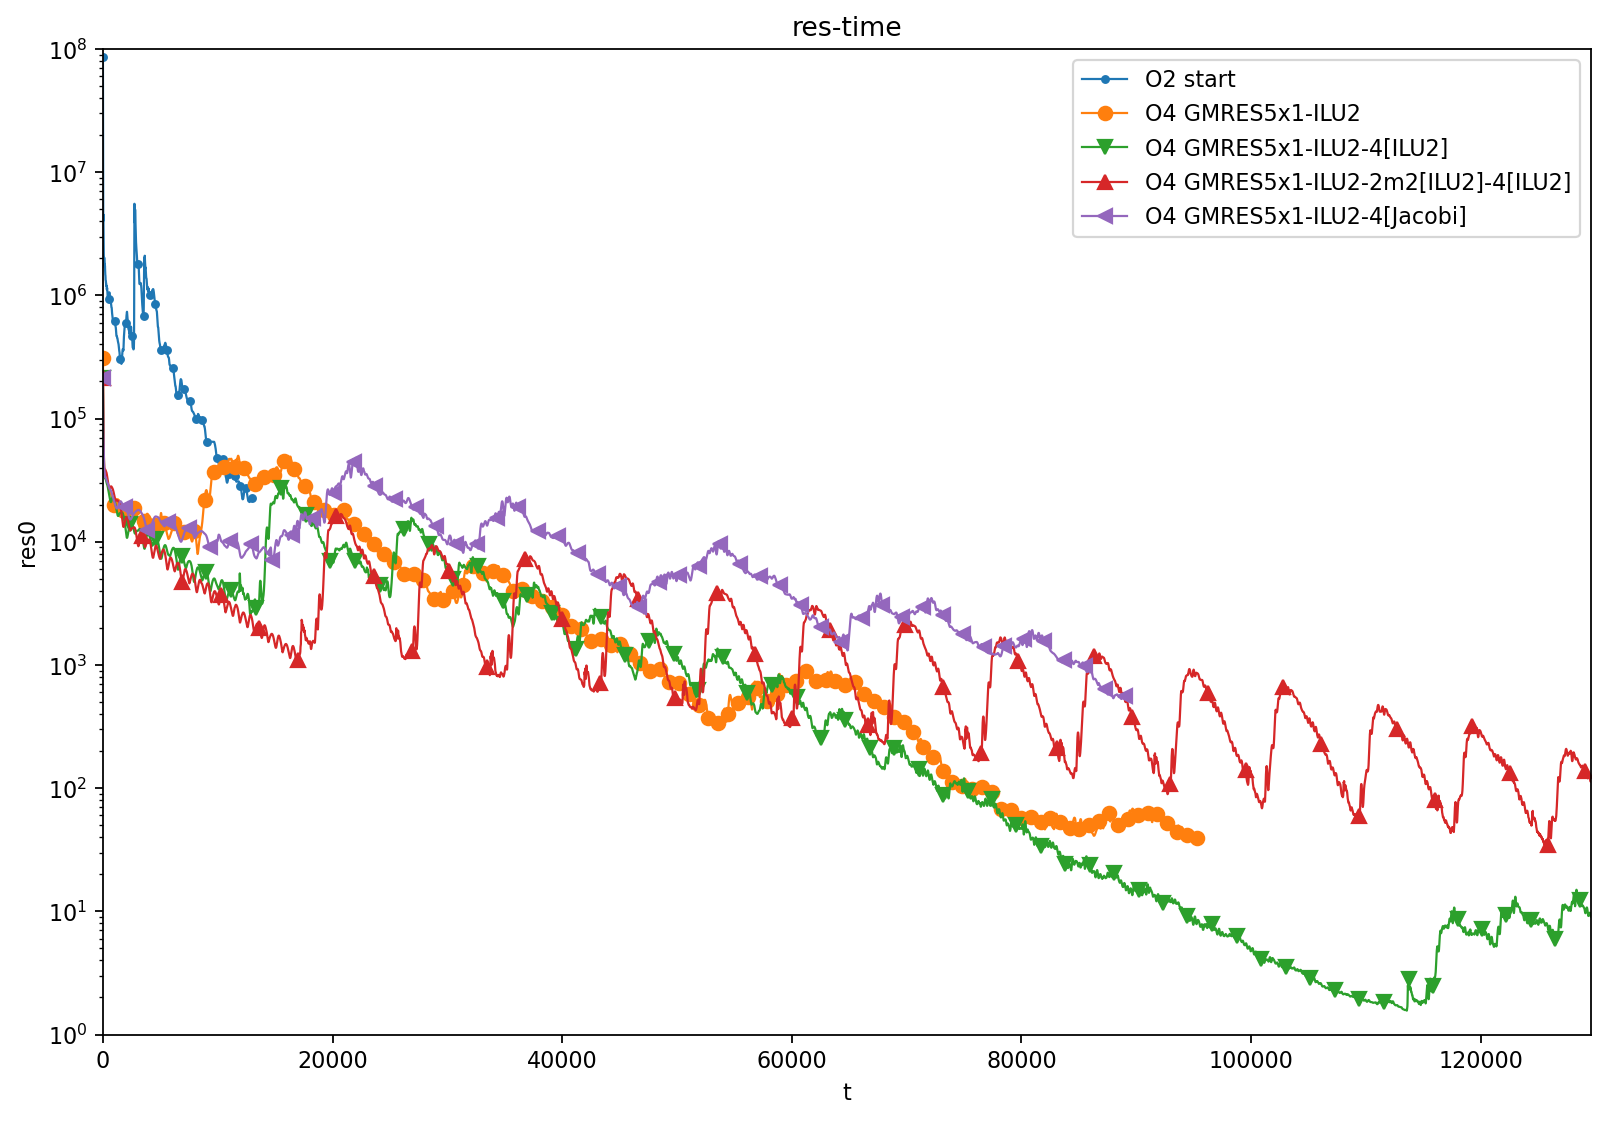

In [4]:
plt.figure(1001, figsize=(12, 8), dpi=160)
plt.title("res-time")
for i, (data, name) in enumerate(data_CRM):
    plotOne(data, name, i)
plotAfter((0, 3600 * 36), (1e0, 1e8))
plt.savefig("crm_thtj_CL0d5-restime.png")

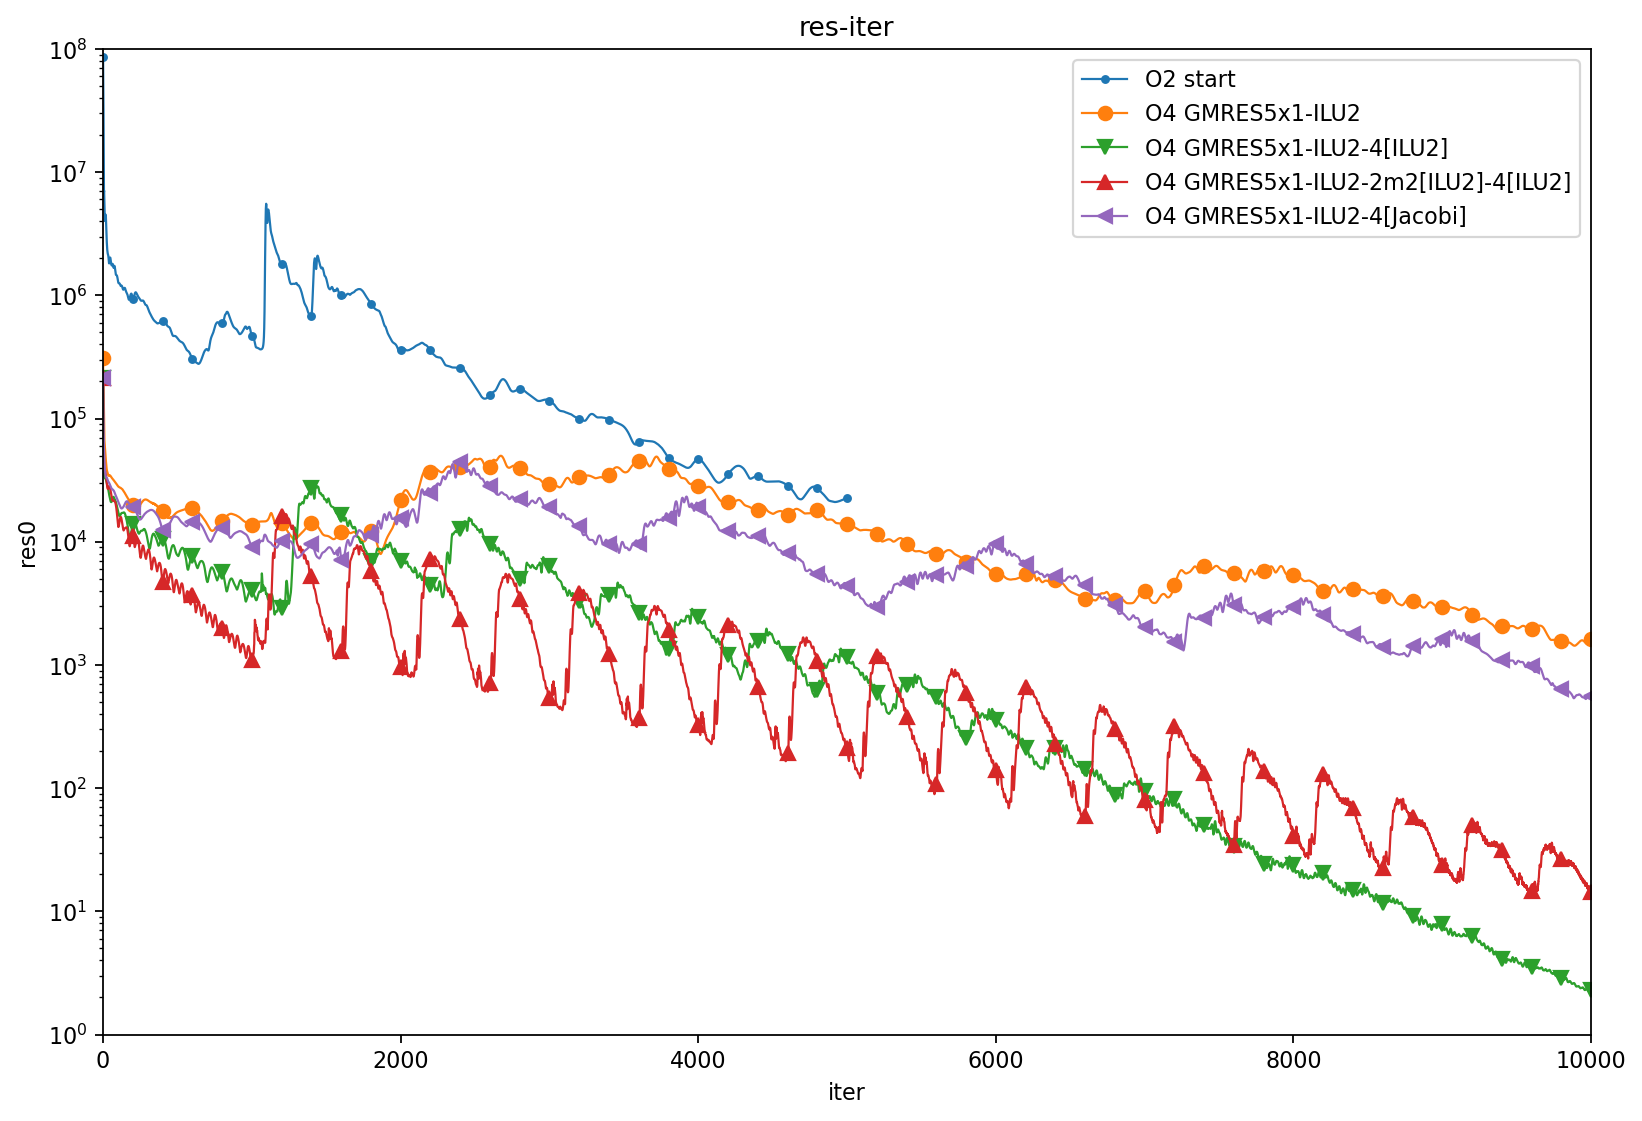

In [5]:
plt.figure(1001, figsize=(12, 8), dpi=160)
plt.title("res-iter")
for i, (data, name) in enumerate(data_CRM):
    plotOne(data, name, i, xAxis="iter")
plotAfter((0, 10000), (1e0, 1e8), xlabel="iter")
plt.savefig("crm_thtj_CL0d5-resiter.png")

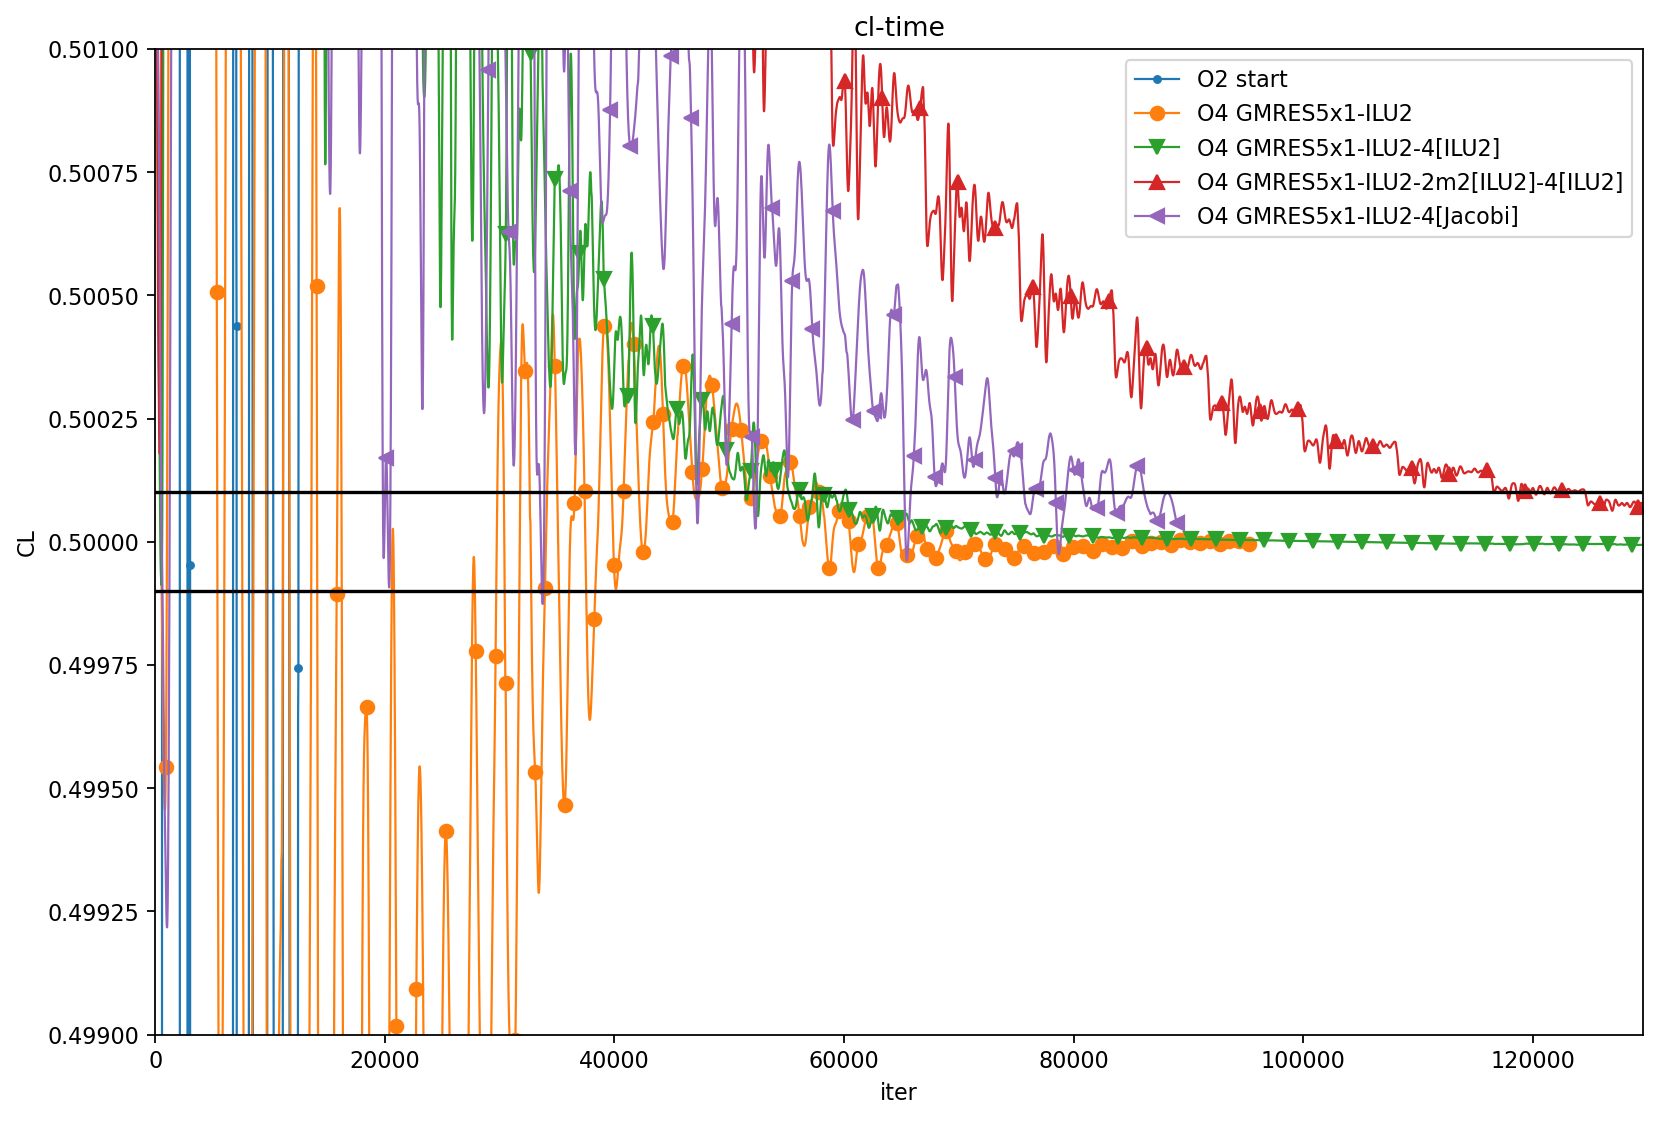

In [6]:
plt.figure(1001, figsize=(12, 8), dpi=160)
plt.title("cl-time")
for i, (data, name) in enumerate(data_CRM):
    plotOne(data, name, i, yAxis="CL")
plt.plot((0, 1e10, 1e10, 0), (0.5 + 1e-4, 0.5 + 1e-4, 0.5 - 1e-4, 0.5 - 1e-4), c="k")
plotAfter(
    (0, 36 * 3600),
    (0.5 - 10e-4, 0.5 + 10e-4),
    xlabel="iter",
    ylabel="CL",
    yscale="linear",
)
plt.savefig("crm_thtj_CL0d5-cltime.png")

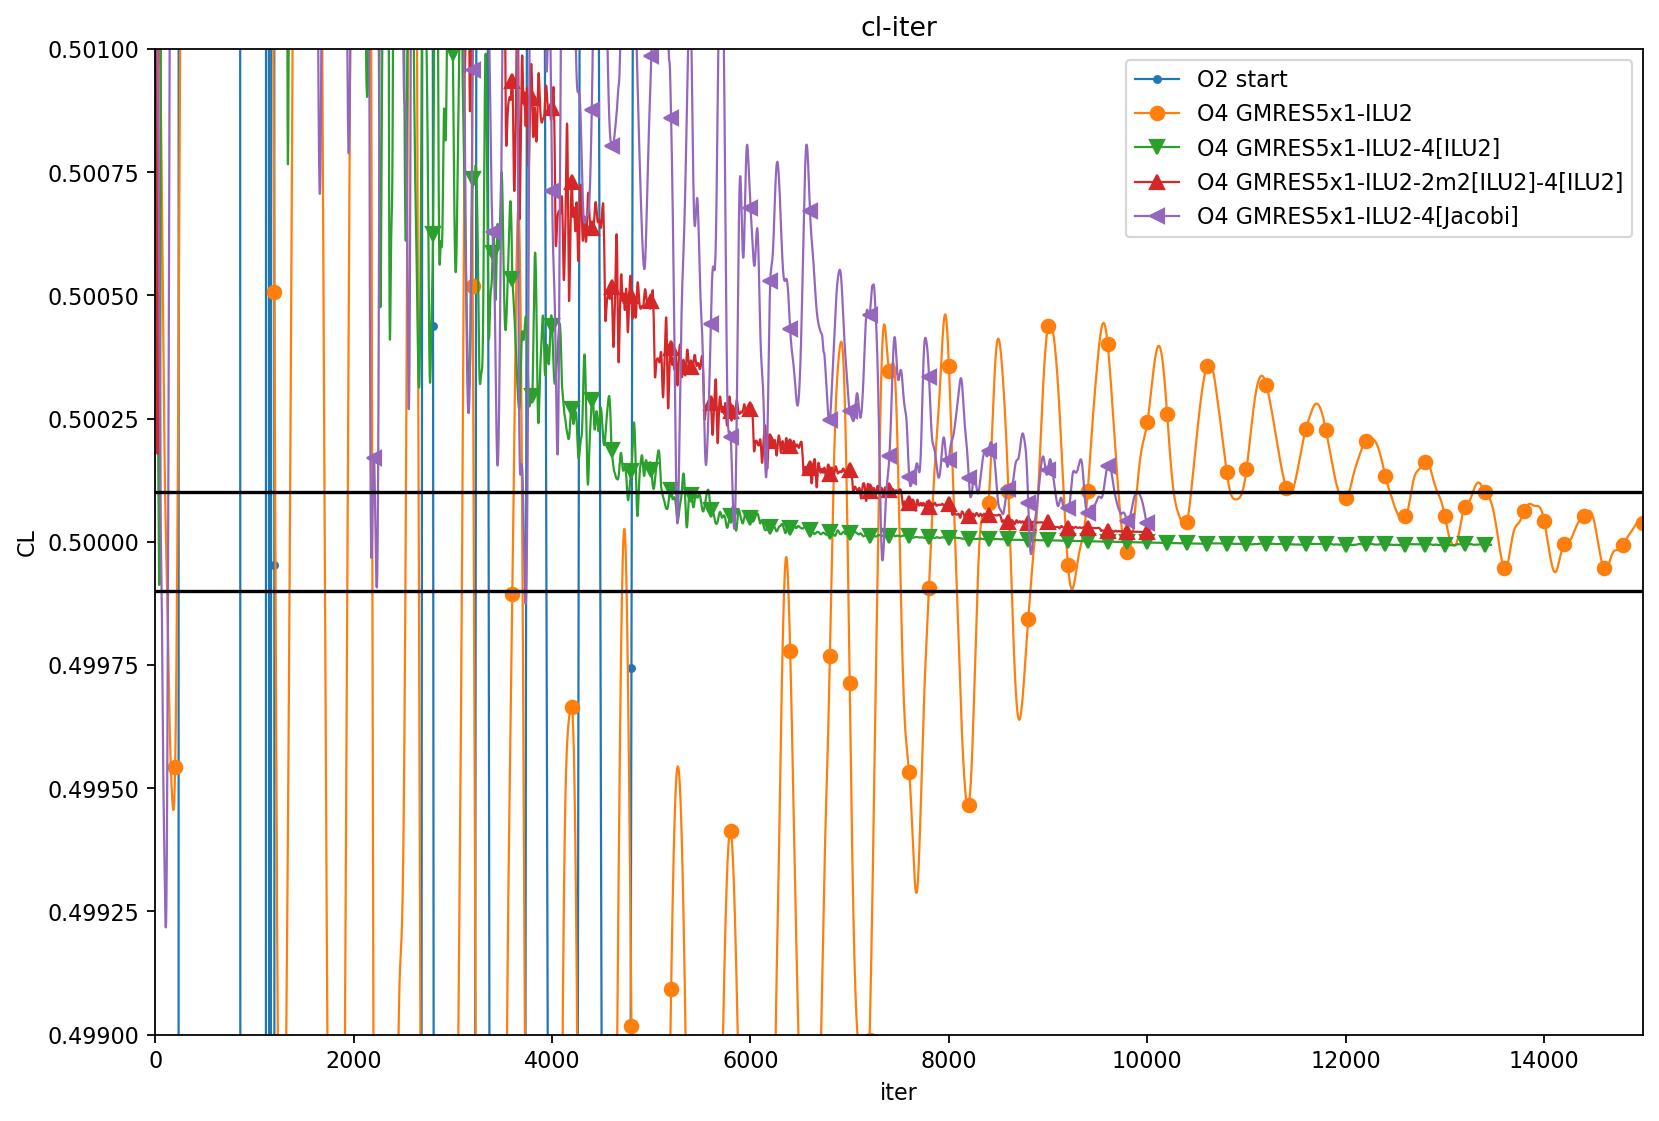

In [7]:
plt.figure(1001, figsize=(12, 8), dpi=160)
plt.title("cl-iter")
for i, (data, name) in enumerate(data_CRM):
    plotOne(data, name, i, yAxis="CL", xAxis="iter")
plt.plot((0, 1e10, 1e10, 0), (0.5 + 1e-4, 0.5 + 1e-4, 0.5 - 1e-4, 0.5 - 1e-4), c="k")
plotAfter(
    (0, 15000), (0.5 - 10e-4, 0.5 + 10e-4), xlabel="iter", ylabel="CL", yscale="linear"
)
plt.savefig("crm_thtj_CL0d5-cliter.png")

[O2 start                                ]: CD = 2.6890e-02 +- 8.8310e-04
[O4 GMRES5x1-ILU2                        ]: CD = 2.5131e-02 +- 5.6761e-07
[O4 GMRES5x1-ILU2-4[ILU2]                ]: CD = 2.5132e-02 +- 2.3278e-07
[O4 GMRES5x1-ILU2-2m2[ILU2]-4[ILU2]      ]: CD = 2.5132e-02 +- 4.0723e-07
[O4 GMRES5x1-ILU2-4[Jacobi]              ]: CD = 2.5135e-02 +- 9.2533e-06


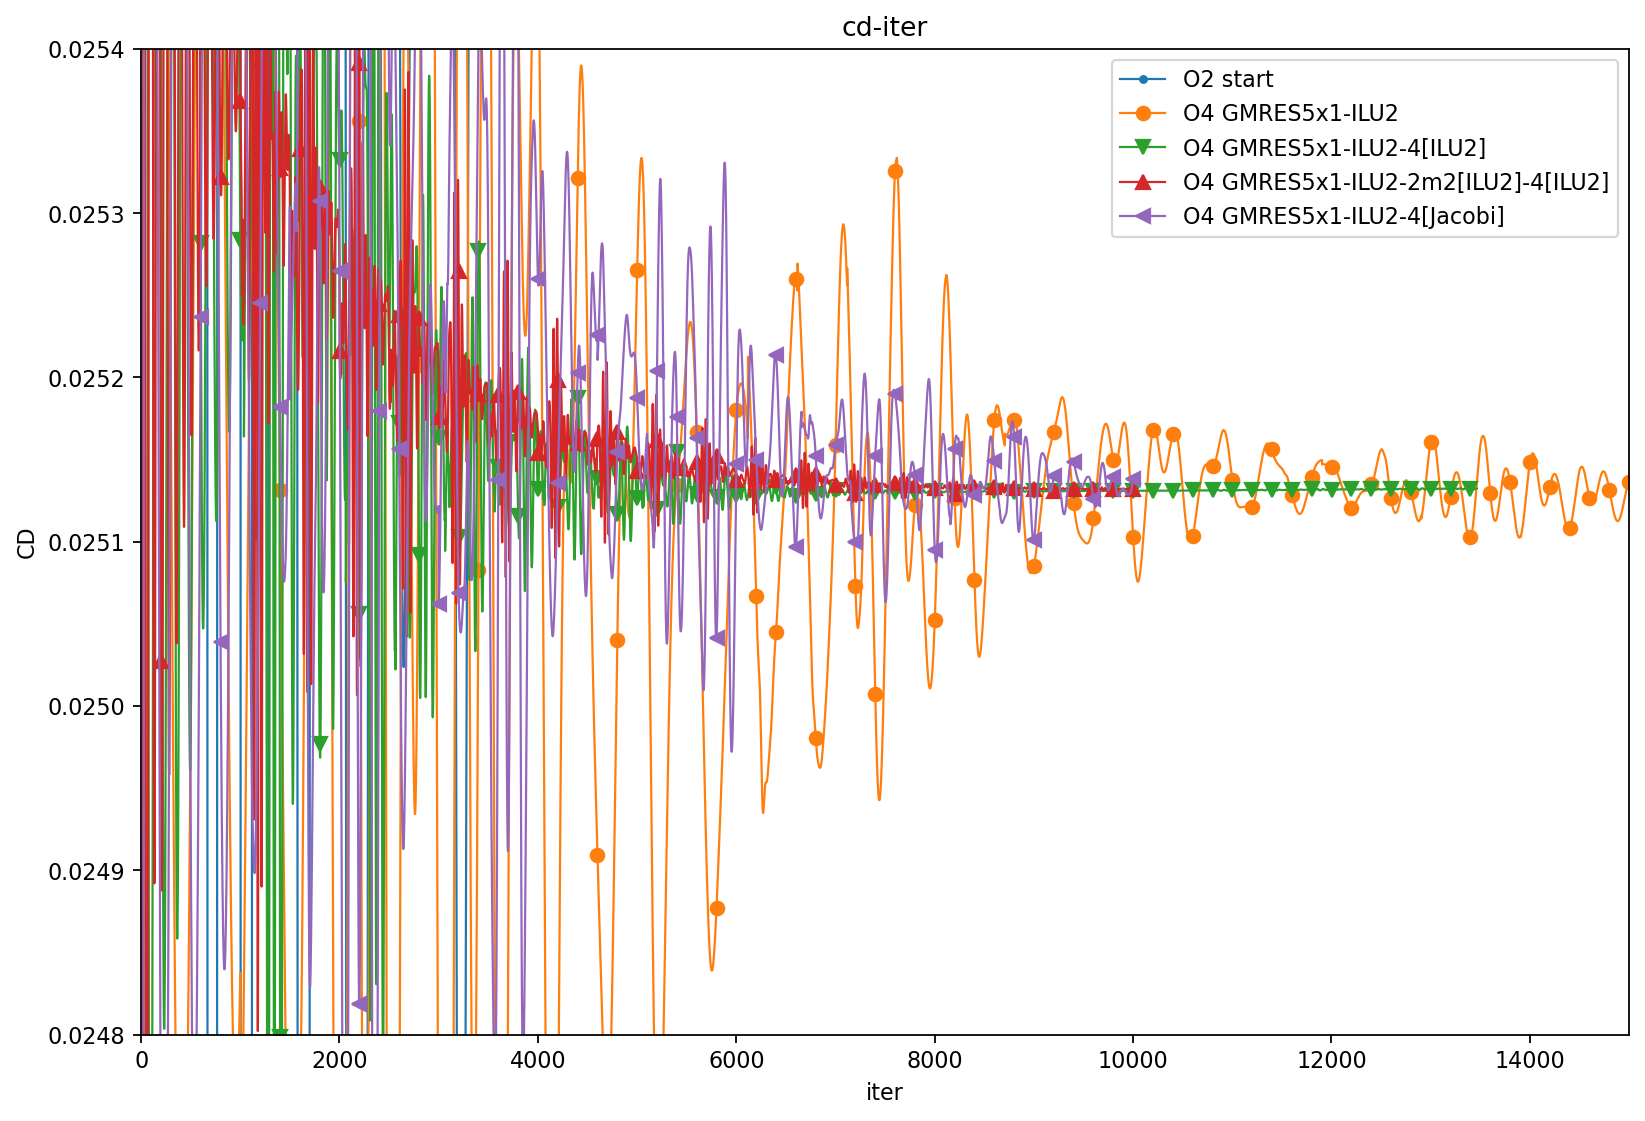

In [8]:
plt.figure(1001, figsize=(12, 8), dpi=160)
plt.title("cd-iter")
for i, (data, name) in enumerate(data_CRM):
    plotOne(data, name, i, yAxis="CD", xAxis="iter")
plotAfter(
    (0, 15000),
    np.array([-1, 1]) * 3e-4 + 2.51e-2,
    xlabel="iter",
    ylabel="CD",
    yscale="linear",
)
plt.savefig("crm_thtj_CL0d5-cditer.png")
for data,name in data_CRM:
    cds = np.array(data["CD"][-1000:-1])
    print(f"[{name :40}]: CD = {cds.mean():.4e} +- {cds.std():.4e}")

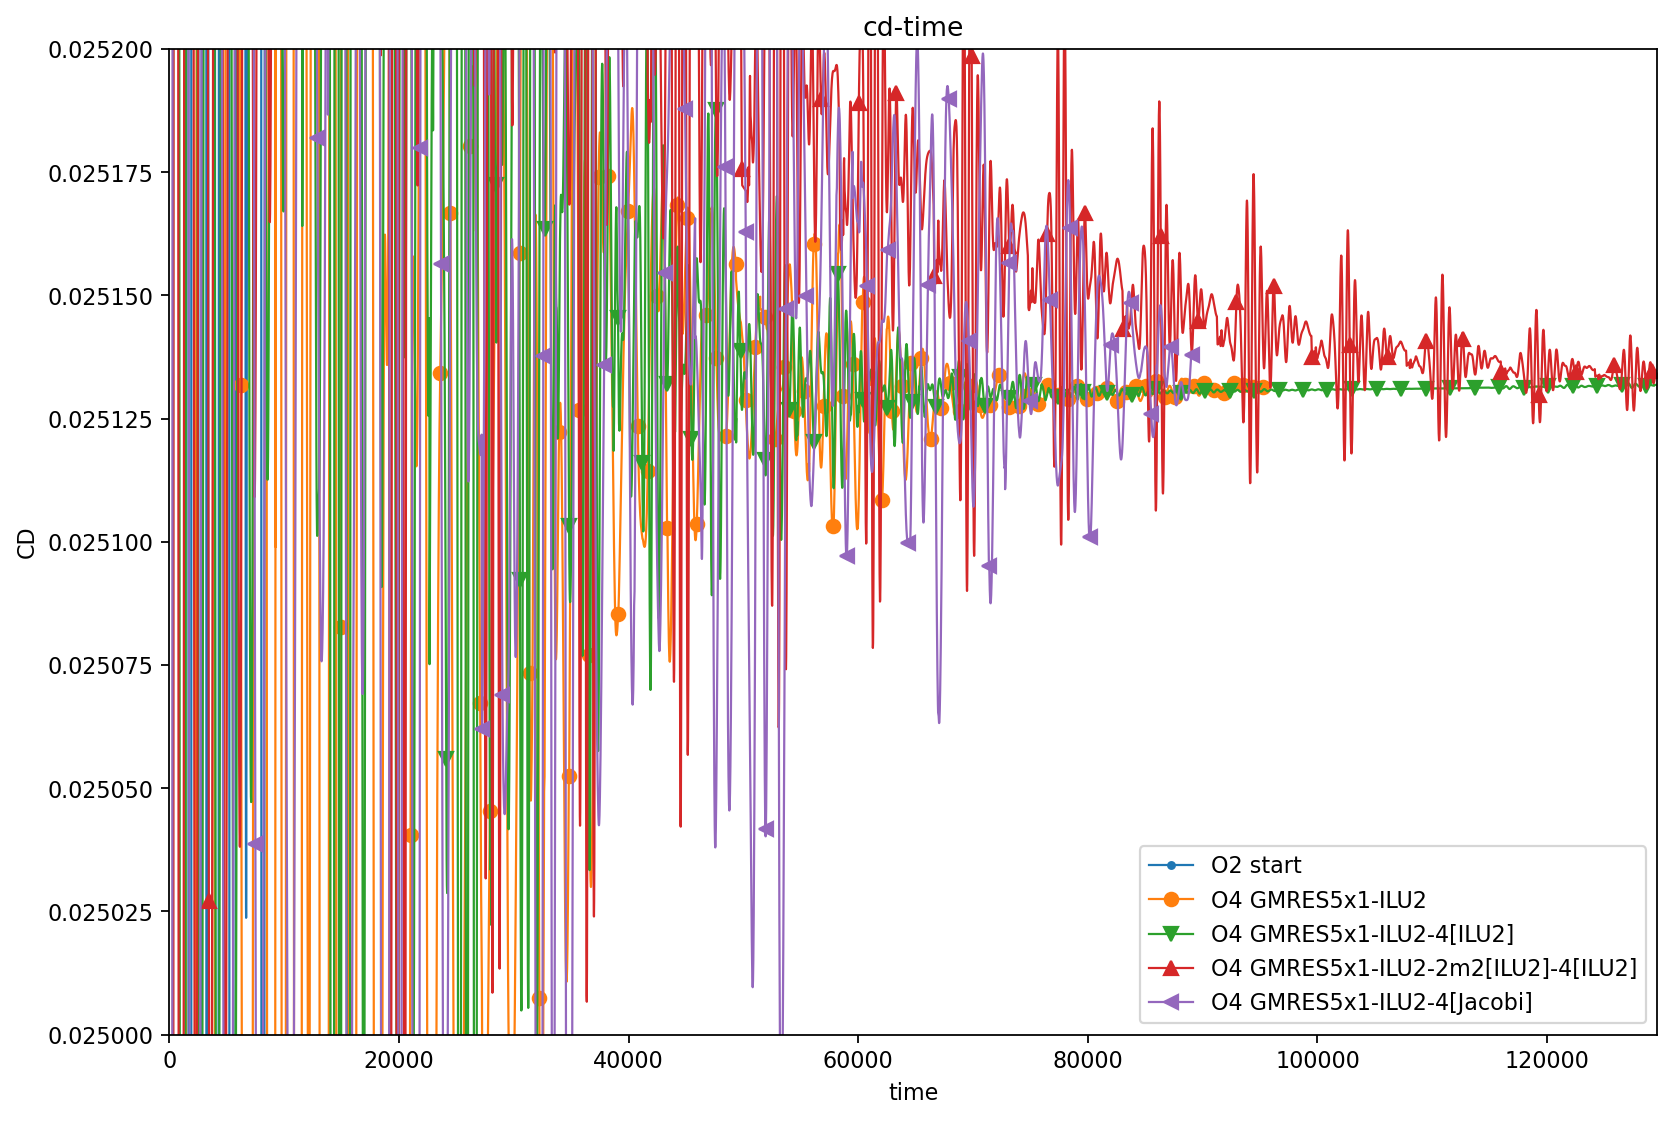

In [9]:
plt.figure(1001, figsize=(12, 8), dpi=160)
plt.title("cd-time")
for i, (data, name) in enumerate(data_CRM):
    plotOne(data, name, i, yAxis="CD", xAxis="tWall")
plotAfter(
    (0, 36*3600),
    np.array([-1, 1]) * 1e-4 + 2.51e-2,
    xlabel="time",
    ylabel="CD",
    yscale="linear",
)
plt.savefig("crm_thtj_CL0d5-cdtime.png")